In [ ]:
# pip install pycaret
#pip install scikit-learn
#pip install tensorflow

In [ ]:
# pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from pycaret.regression import *
from pycaret.regression import compare_models, create_model, evaluate_model, get_config
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

### Loading stock market data into a pandas dataframe for further analysis. The file contains historical stock prices and various technical indicators related to the NASDAQ companies

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Milestone II/scraped_stock_data.csv")
df.head()

,Date,Open,High,Low,Close Close price adjusted for splits.,Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.,Volume,Ticker,Company Name
0,"Dec 29, 2023",50.30,50.57,49.77,50.25,49.59,"29,266,500",INTC,Intel
1,"Dec 28, 2023",50.81,50.87,50.16,50.39,49.72,"27,705,200",INTC,Intel
2,"Dec 27, 2023",50.63,51.28,50.19,50.76,50.09,"52,148,000",INTC,Intel
3,"Dec 26, 2023",48.92,50.52,48.71,50.50,49.83,"60,287,400",INTC,Intel
4,"Dec 22, 2023",47.25,48.16,47.20,48.00,47.37,"30,053,700",INTC,Intel


In [ ]:
print(df.columns)

Index(['Date  ', 'Open  ', 'High  ', 'Low  ',
       'Close    Close price adjusted for splits. ',
       'Adj Close    Adjusted close price adjusted for splits and dividend and/or capital gain distributions. ',
       'Volume  ', 'Ticker', 'Company Name'],
      dtype='object')


### Looking at the columns of the dataframe

In [ ]:
df.columns = df.columns.str.strip()

### Converting the Date column in the dataframe df to datetime objects

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

### Renaming the columns

In [ ]:
df = df.rename(columns={
    'Close    Close price adjusted for splits.': 'Close',
    'Adj Close    Adjusted close price adjusted for splits and dividend and/or capital gain distributions.': 'Adj Close'
})

# Check the updated column names
print(df.head())

        Date   Open   High    Low  Close  Adj Close      Volume Ticker  \
0 2023-12-29  50.30  50.57  49.77  50.25      49.59  29,266,500   INTC   
1 2023-12-28  50.81  50.87  50.16  50.39      49.72  27,705,200   INTC   
2 2023-12-27  50.63  51.28  50.19  50.76      50.09  52,148,000   INTC   
3 2023-12-26  48.92  50.52  48.71  50.50      49.83  60,287,400   INTC   
4 2023-12-22  47.25  48.16  47.20  48.00      47.37  30,053,700   INTC   

  Company Name  
0        Intel  
1        Intel  
2        Intel  
3        Intel  
4        Intel  


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open,object
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,object
Ticker,object
Company Name,object


### Converting the 'Open' column in the dataframe to a numeric data type
### Converting 'Volume' to String
### Removing Commas from 'Volume' and Converting to Numeric

In [ ]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = df['Volume'].astype(str)
# Convert 'Volume' column to integer after removing commas
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce').astype('Int64')  # Optional: 'Int64' handles NaN values if necessary

# Check the updated dataframe
print(df.head())


        Date   Open   High    Low  Close  Adj Close    Volume Ticker  \
0 2023-12-29  50.30  50.57  49.77  50.25      49.59  29266500   INTC   
1 2023-12-28  50.81  50.87  50.16  50.39      49.72  27705200   INTC   
2 2023-12-27  50.63  51.28  50.19  50.76      50.09  52148000   INTC   
3 2023-12-26  48.92  50.52  48.71  50.50      49.83  60287400   INTC   
4 2023-12-22  47.25  48.16  47.20  48.00      47.37  30053700   INTC   

  Company Name  
0        Intel  
1        Intel  
2        Intel  
3        Intel  
4        Intel  


### Finding missing values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date               0
Open            1267
High            1267
Low             1267
Close           1267
Adj Close       1267
Volume          1269
Ticker             0
Company Name       0
dtype: int64


In [ ]:
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)

             Date  Open  High   Low  Close  Adj Close  Volume Ticker  \
37     2023-11-06   NaN   NaN   NaN    NaN        NaN    <NA>   INTC   
103    2023-08-04   NaN   NaN   NaN    NaN        NaN    <NA>   INTC   
167    2023-05-04   NaN   NaN   NaN    NaN        NaN    <NA>   INTC   
229    2023-02-06   NaN   NaN   NaN    NaN        NaN    <NA>   INTC   
292    2022-11-04   NaN   NaN   NaN    NaN        NaN    <NA>   INTC   
...           ...   ...   ...   ...    ...        ...     ...    ...   
172562 2013-11-13   NaN   NaN   NaN    NaN        NaN    <NA>    CDW   
173027 2022-07-18   NaN   NaN   NaN    NaN        NaN    <NA>   GOOG   
174847 2015-04-27   NaN   NaN   NaN    NaN        NaN    <NA>   GOOG   
175120 2014-03-27   NaN   NaN   NaN    NaN        NaN    <NA>   GOOG   
179566 2015-12-09  21.0  21.0  21.0   21.0       21.0    <NA>   TEAM   

              Company Name  
37                   Intel  
103                  Intel  
167                  Intel  
229                

In [ ]:
df_cleaned = df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Check if missing values remain
print(df_cleaned.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Ticker          0
Company Name    0
dtype: int64


In [ ]:
# df_cleaned.to_csv('cleaned_stock_data.csv', index=False)

### Adding additional features

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/feature_eng_stock.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,Ticker_numeric,Company_Name_numeric
0,2023-12-29,50.30,50.57,49.77,50.25,49.59,29266500,0.000049,NaN,NaN,NaN,NaN,NaN,NaN,1451.325735,20,21
1,2023-12-28,50.81,50.87,50.16,50.39,49.72,27705200,-0.000083,NaN,NaN,NaN,NaN,NaN,NaN,1377.502544,20,21
2,2023-12-27,50.63,51.28,50.19,50.76,50.09,52148000,0.000186,NaN,NaN,NaN,NaN,NaN,NaN,2612.093320,20,21
3,2023-12-26,48.92,50.52,48.71,50.50,49.83,60287400,0.000534,NaN,NaN,NaN,NaN,NaN,NaN,3004.121142,20,21
4,2023-12-22,47.25,48.16,47.20,48.00,47.37,30053700,0.000200,NaN,NaN,NaN,NaN,NaN,NaN,1423.643769,20,21


In [ ]:
null_values = df1.isnull().sum()
print(null_values)

Date                       0
Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
garman_klass_vol           0
rsi                      840
bb_low                   798
bb_mid                   798
bb_high                  798
atr                      588
macd                    1050
dollar_volume              0
Ticker_numeric             0
Company_Name_numeric       0
dtype: int64


### Stock closing prices over time

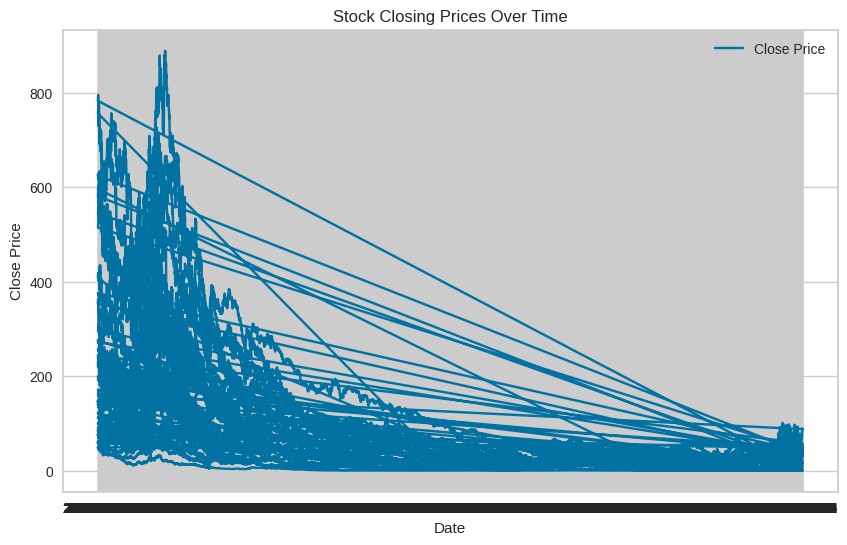

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df1['Date'], df1['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
print(df1.dtypes)

Date                     object
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
garman_klass_vol        float64
rsi                     float64
bb_low                  float64
bb_mid                  float64
bb_high                 float64
atr                     float64
macd                    float64
dollar_volume           float64
Ticker_numeric            int64
Company_Name_numeric      int64
dtype: object


### Fixing the timeline of train and test start and end date

In [ ]:
# Ensure that 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Define train and test date ranges
train_start_date = pd.to_datetime('2010-01-01')
train_end_date = pd.to_datetime('2015-01-01')

test_start_date = pd.to_datetime('2015-01-01')
test_end_date = pd.to_datetime('2016-01-01')

In [ ]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric'],
      dtype='object')

In [ ]:
df1.dropna(inplace=True)

### Splitting train and test data

In [ ]:
# Split train data
train_data = df1[(df1['Date'] >= train_start_date) & (df1['Date'] < train_end_date)]

# Split test data
test_data = df1[(df1['Date'] >= test_start_date) & (df1['Date'] < test_end_date)]

# Check the result
print("Training data:", train_data.shape)
print("Test data:", test_data.shape)

Training data: (38477, 17)
Test data: (8288, 17)


### Running the Linear Regression model

In [ ]:
# Define the features (e.g., Open, High, Low) and target (e.g., Close)
X_train = train_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_train = train_data['Close']  # Target variable for training

X_test = test_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_test = test_data['Close']  # Target variable for testing

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1514195698137325


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.999886446117222


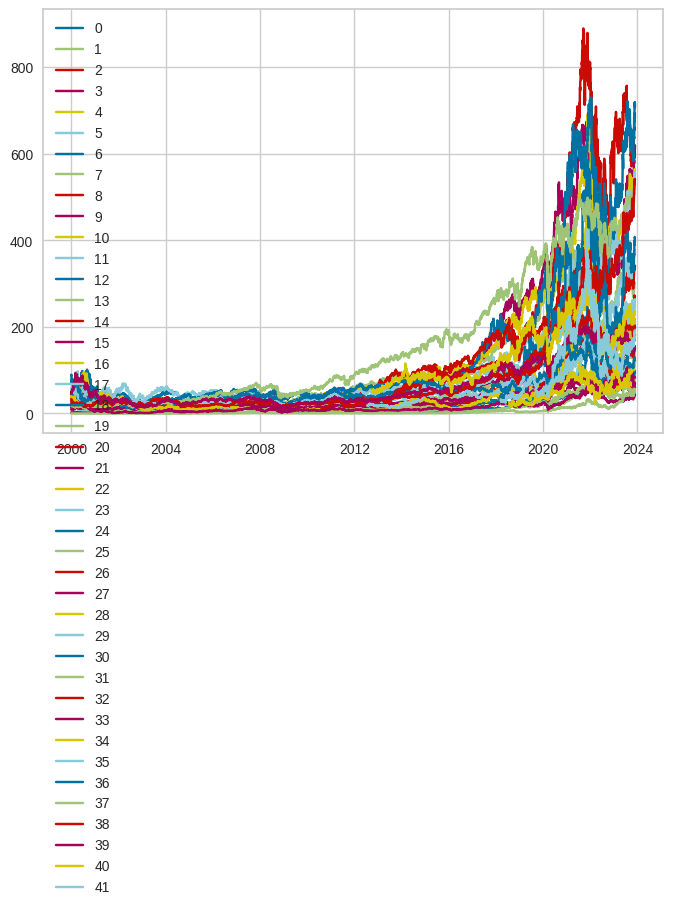

In [ ]:
##we can perform a separate analysis of each company's
##stock price performance and compare them using various models
##After training models for each company, you can compare key metrics such as:

##Mean Squared Error (MSE)
##R-squared values
##Accuracy (if using a classification model)
#Trends in stock price prediction
company_groups = df1.groupby('Company_Name_numeric')
for company_name, group in company_groups:
    plt.plot(group['Date'], group['Close'], label=company_name)
plt.legend()
plt.show()

### Checking for overfitting

In [ ]:
# Initialize your model
model = LinearRegression()

# Set up the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Assuming 'X' is the feature matrix and 'y' is the target variable (e.g., stock prices)
# Perform cross-validation and calculate MSE
cross_val_mse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average cross-validated MSE
avg_mse = np.mean(-cross_val_mse)
print(f"Average Cross-Validated MSE: {avg_mse}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Evaluate the model on a separate test set
y_pred_test = model.predict(X_test)

# Calculate MSE and R-squared for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set MSE: {mse_test}")
print(f"Test Set R-squared: {r2_test}")

# Check for overfitting by comparing cross-validated MSE with test set MSE
if mse_test > avg_mse:
    print("The model may be overfitting as the test set error is higher than the cross-validated error.")
else:
    print("The model generalizes well as the test set error is similar to the cross-validated error.")

Average Cross-Validated MSE: 0.05960972200699956
Test Set MSE: 0.1514195698137325
Test Set R-squared: 0.999886446117222
The model may be overfitting as the test set error is higher than the cross-validated error.


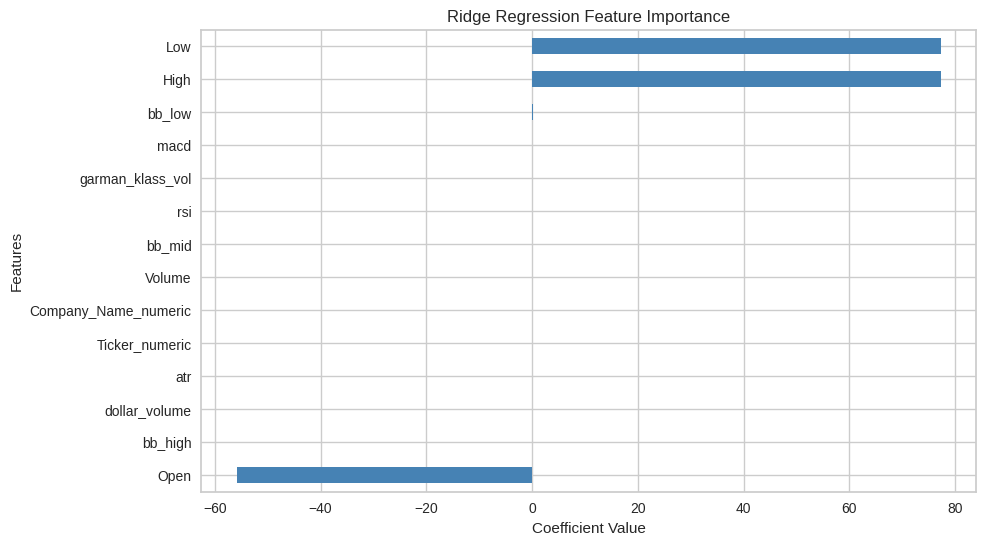

Test Set MSE (Ridge): 1.0274220864872659
Test Set R-squared (Ridge): 0.9998951042152764


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
X = df1[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]
y = df1['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Extract feature importances (coefficients) from Ridge
ridge_feature_importances = pd.Series(ridge_model.coef_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
ridge_feature_importances.sort_values().plot(kind='barh', color='steelblue')
plt.title("Ridge Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Evaluate the model on the test set
y_pred_test = ridge_model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set MSE (Ridge): {mse_test}")
print(f"Test Set R-squared (Ridge): {r2_test}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength

# Set up KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and calculate cross-validated MSE
ridge_cv_mse = cross_val_score(ridge_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive and calculate the average
ridge_avg_cv_mse = np.mean(-ridge_cv_mse)
ridge_std_cv_mse = np.std(-ridge_cv_mse)

print(f"Cross-Validated MSE (Ridge): {ridge_avg_cv_mse} ± {ridge_std_cv_mse}")

# Fit the Ridge model on the entire training set
ridge_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_test = ridge_model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set MSE (Ridge): {mse_test}")
print(f"Test Set R-squared (Ridge): {r2_test}")

# Check for overfitting by comparing cross-validated MSE with test set MSE
if mse_test > ridge_avg_cv_mse:
    print("The model may be overfitting as the test set error is higher than the cross-validated error.")
else:
    print("The model generalizes well as the test set error is similar to the cross-validated error.")


Cross-Validated MSE (Ridge): 1.117028238541739 ± 0.08212009676838207
Test Set MSE (Ridge): 1.0182533328401315
Test Set R-squared (Ridge): 0.9998960403092356
The model generalizes well as the test set error is similar to the cross-validated error.


In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target (y) values separately
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Set up KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso_model = Lasso(alpha=0.01)  # You can tune the alpha value
lasso_cv_mse = cross_val_score(lasso_model, X_train_scaled, y_train_scaled.ravel(), cv=kf, scoring='neg_mean_squared_error')

# Average MSE for Lasso
lasso_avg_mse = np.mean(-lasso_cv_mse)
print(f"Average Cross-Validated MSE (Lasso): {lasso_avg_mse}")

# Fit the Lasso model on the entire training set
lasso_model.fit(X_train_scaled, y_train_scaled.ravel())

# Predict on the test set
y_lasso_pred_scaled = lasso_model.predict(X_test_scaled)

# Inverse transform the predicted values back to original scale
y_lasso_pred = target_scaler.inverse_transform(y_lasso_pred_scaled.reshape(-1, 1))

# Calculate MSE and R-squared for Lasso on the test set
lasso_mse_test = mean_squared_error(y_test, y_lasso_pred)
lasso_r2_test = r2_score(y_test, y_lasso_pred)

print(f"Test Set MSE (Lasso): {lasso_mse_test}")
print(f"Test Set R-squared (Lasso): {lasso_r2_test}")
if lasso_mse_test > lasso_avg_mse:
    print("Lasso: The model may be overfitting as the test set error is higher than the cross-validated error.")
else:
    print("Lasso: The model generalizes well as the test set error is similar to the cross-validated error.")

Average Cross-Validated MSE (Lasso): 0.0005389545678474598
Test Set MSE (Lasso): 5.448672011497783
Test Set R-squared (Lasso): 0.9994437118552688
Lasso: The model may be overfitting as the test set error is higher than the cross-validated error.


In [ ]:
regression_setup = setup(data=df1, target='Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(184715, 17)"
4,Transformed data shape,"(184715, 19)"
5,Transformed train set shape,"(129300, 19)"
6,Transformed test set shape,"(55415, 19)"
7,Numeric features,15
8,Date features,1
9,Preprocess,True


In [ ]:
# Compare different models and rank them based on performance metrics
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:50:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4853,1.0020,1.0006,0.9999,0.0214,0.0191,1.4850
ridge,Ridge Regression,0.4847,1.0020,1.0006,0.9999,0.0211,0.0189,0.2540
br,Bayesian Ridge,0.4852,1.0020,1.0006,0.9999,0.0213,0.0191,0.3850
dt,Decision Tree Regressor,0.4606,1.3478,1.1607,0.9999,0.0118,0.0077,4.1120
llar,Lasso Least Angle Regression,0.6355,1.6434,1.2815,0.9998,0.0248,0.0258,0.3530
lasso,Lasso Regression,0.9140,3.7803,1.9433,0.9996,0.0309,0.0324,3.5600
en,Elastic Net,0.8947,3.6403,1.9070,0.9996,0.0301,0.0317,4.2330
knn,K Neighbors Regressor,33.4303,3141.0017,56.0399,0.6765,0.8861,1.8545,10.6870
omp,Orthogonal Matching Pursuit,62.3404,9460.0355,97.2557,0.0259,1.3318,6.3323,0.3100
huber,Huber Regressor,71.1733,14777.6704,121.5576,-0.5218,3.7158,1.4058,0.4790


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Train the Random Forest Regressor
rf_model = create_model('rf')

# Train the Extra Trees Regressor
et_model = create_model('et')

In [ ]:
plot_model (best_model, plot='residuals')

In [ ]:
plot_model (best_model, plot='error')

In [ ]:
plot_model (best_model, plot='feature')

In [ ]:
evaluate_model(best_model)

In [ ]:
holdout_pred=predict_model(best_model)
holdout_pred.head()

# This is our deep learning model to improve the MSE

In [ ]:
# Get training and test data from PyCaret
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

MLP Regressor MSE: 0.6069542537239865


In [ ]:
# Try different hyperparameters for the MLP Regressor
mlp_tuned = MLPRegressor(hidden_layer_sizes=(200, 100), activation='tanh', solver='adam', max_iter=2000, random_state=42)
mlp_tuned.fit(X_train_scaled, y_train)

# Predict and evaluate the tuned MLP model
y_pred_mlp_tuned = mlp_tuned.predict(X_test_scaled)
mlp_tuned_mse = mean_squared_error(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Regressor MSE: {mlp_tuned_mse}')

In [ ]:
# Define a deeper model for tuning
model_tuned = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the tuned model
model_tuned.compile(optimizer='adam', loss='mse')

# Train the tuned model
history_tuned = model_tuned.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the tuned deep learning model
y_pred_dl_tuned = model_tuned.predict(X_test_scaled)
dl_tuned_mse = mean_squared_error(y_test, y_pred_dl_tuned)
print(f'Tuned Deep Learning Regressor MSE: {dl_tuned_mse}')

In [ ]:
# Define the model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Using 'neg_mean_squared_error' to evaluate the model, as cross_val_score returns negative MSE to maximize it
scores = cross_val_score(mlp_regressor, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative scores to positive and calculate average MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE from cross-validation: {mean_mse}")


In [ ]:
# Define a deeper model for tuning with regularization and dropout
model_improved = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(1)
])

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mse')

# Train the improved model
history_improved = model_improved.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the improved deep learning model
y_pred_dl_improved = model_improved.predict(X_test_scaled)
dl_improved_mse = mean_squared_error(y_test, y_pred_dl_improved)
print(f'Improved Deep Learning Regressor MSE: {dl_improved_mse}')


In [ ]:
# Define an updated model with reduced regularization and dropout rates
model_updated = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 Regularization
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the updated model
model_updated.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the updated model
history_updated = model_updated.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2,
                                    callbacks=[early_stopping], verbose=0)

# Predict and evaluate the updated deep learning model
y_pred_dl_updated = model_updated.predict(X_test_scaled)
dl_updated_mse = mean_squared_error(y_test, y_pred_dl_updated)
print(f'Updated Deep Learning Regressor MSE: {dl_updated_mse}')

# Plot training and validation loss
plt.plot(history_updated.history['loss'], label='Training Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Define an updated model with reduced complexity and increased dropout rate
model_further_improved = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the improved model
model_further_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Define early stopping callback with increased patience
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the further improved model
history_further_improved = model_further_improved.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2,
                                                      callbacks=[early_stopping], verbose=0)

# Predict and evaluate the further improved deep learning model
y_pred_dl_further_improved = model_further_improved.predict(X_test_scaled)
dl_further_improved_mse = mean_squared_error(y_test, y_pred_dl_further_improved)
print(f'Further Improved Deep Learning Regressor MSE: {dl_further_improved_mse}')

# Plot training and validation loss
plt.plot(history_further_improved.history['loss'], label='Training Loss')
plt.plot(history_further_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Further Improved Model)')
plt.show()
